# 96-CV-Correlation between Content Rating and Installs per Category

## Imports

In [1]:
import pandas as pd
import numpy as numpy

import matplotlib.pyplot as plt

from scipy import stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Data Reading and Preparation

In [2]:
data = pd.read_csv('googleplaystoremaster.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.shape

(10841, 13)

In [4]:
data = data.filter(items=['Category', 'Installs', 'Content Rating'])
data.rename(columns={'Content Rating': 'ContentRating'}, inplace=True) # renamed because a two word column name interfered with the ols syntax
data.head()

,Category,Installs,ContentRating
0,ART_AND_DESIGN,"10,000+",Everyone
1,ART_AND_DESIGN,"500,000+",Everyone
2,ART_AND_DESIGN,"5,000,000+",Everyone
3,ART_AND_DESIGN,"50,000,000+",Teen
4,ART_AND_DESIGN,"100,000+",Everyone


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       10841 non-null  object
 1   Installs       10841 non-null  object
 2   ContentRating  10840 non-null  object
dtypes: object(3)
memory usage: 254.2+ KB


In [6]:
data[data['ContentRating'].isnull()]

,Category,Installs,ContentRating
10472,1.9,Free,NaN


In [7]:
data = data[data['ContentRating'].notnull()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       10840 non-null  object
 1   Installs       10840 non-null  object
 2   ContentRating  10840 non-null  object
dtypes: object(3)
memory usage: 338.8+ KB


In [8]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [9]:
data['Category'].nunique()

33

In [10]:
data['ContentRating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [11]:
data['ContentRating'].nunique()

6

In [12]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [13]:
data['Installs'].nunique()

21

<AxesSubplot:>

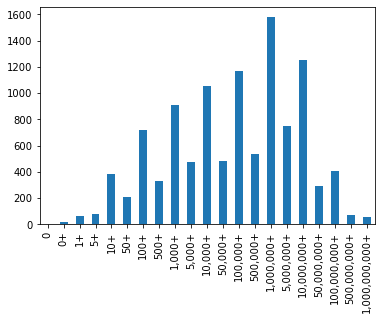

In [14]:
data.Installs.value_counts().reindex(["0", "0+", "1+", "5+", "10+", "50+", "100+", "500+", "1,000+", "5,000+", "10,000+", "50,000+", "100,000+", "500,000+", "1,000,000+", "5,000,000+", "10,000,000+", "50,000,000+", "100,000,000+", "500,000,000+", "1,000,000,000+"]).plot(kind='bar')

In [15]:
data['Installs'] = data['Installs'].str.replace(',','')
data['Installs'] = data['Installs'].str.replace('+','')

data['Installs'] = pd.to_numeric(data['Installs'])


<ipython-input-15-ab199d75a5ff>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Installs'] = data['Installs'].str.replace('+','')


In [16]:
data.head()

,Category,Installs,ContentRating
0,ART_AND_DESIGN,10000,Everyone
1,ART_AND_DESIGN,500000,Everyone
2,ART_AND_DESIGN,5000000,Everyone
3,ART_AND_DESIGN,50000000,Teen
4,ART_AND_DESIGN,100000,Everyone


## Summary and Box plots

### Grouped by Category

In [17]:
rp.summary_cont(data.groupby(['Category']))['Installs']

,N,Mean,SD,SE,95% Conf.,Interval
Category,,,,,,
ART_AND_DESIGN,65,1.912894e+06,6.664810e+06,8.266680e+05,2.614347e+05,3.564353e+06
AUTO_AND_VEHICLES,85,6.250613e+05,1.746710e+06,1.894573e+05,2.483048e+05,1.001818e+06
BEAUTY,53,5.131519e+05,1.523140e+06,2.092193e+05,9.332255e+04,9.329812e+05
BOOKS_AND_REFERENCE,231,8.318050e+06,6.745986e+07,4.438533e+06,-4.273327e+05,1.706343e+07
BUSINESS,460,2.178076e+06,1.019870e+07,4.755167e+05,1.243616e+06,3.112535e+06
COMICS,60,9.347692e+05,2.103069e+06,2.715051e+05,3.914888e+05,1.478050e+06
COMMUNICATION,387,8.435989e+07,2.327870e+08,1.183323e+07,6.109424e+07,1.076255e+08
DATING,234,1.129533e+06,2.673457e+06,1.747693e+05,7.852032e+05,1.473864e+06
EDUCATION,156,5.586231e+06,1.580886e+07,1.265722e+06,3.085941e+06,8.086521e+06


<AxesSubplot:title={'center':'Installs'}, xlabel='Category'>

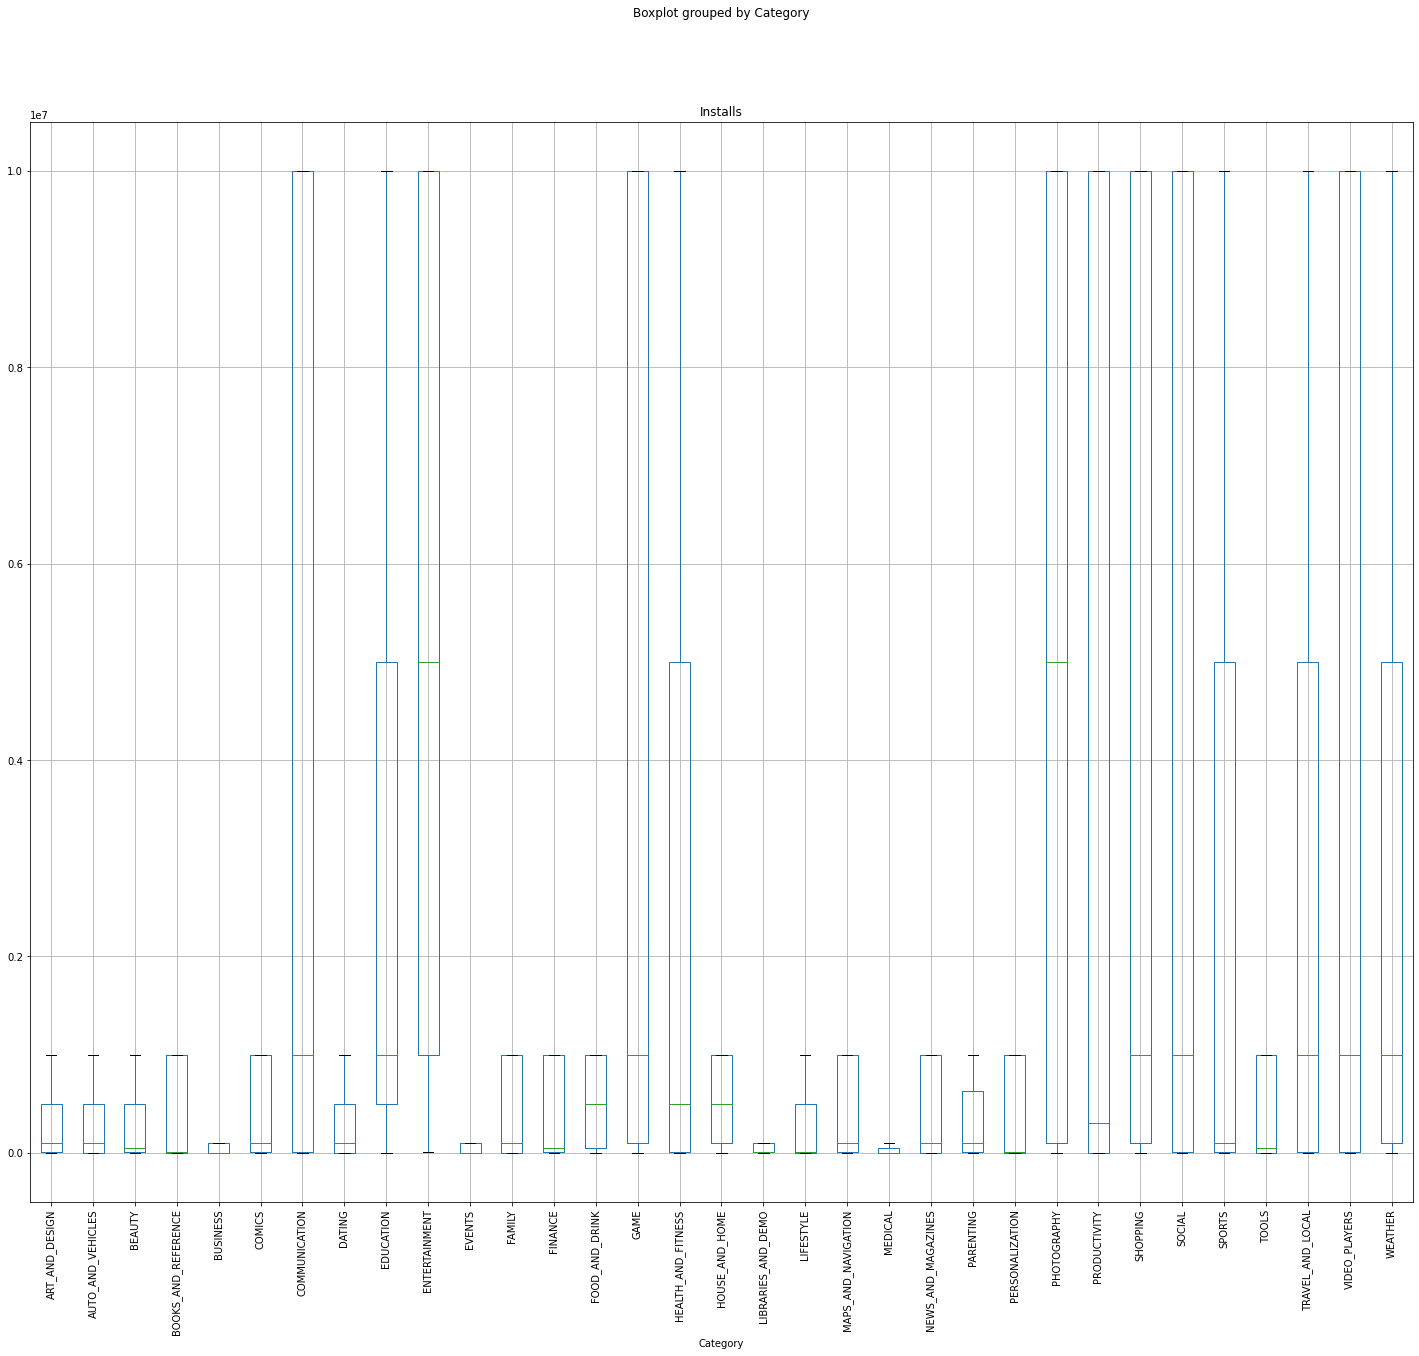

In [18]:
data.boxplot(column=['Installs'], by='Category',  figsize=(24, 20), rot=90, showfliers=False)
#, notch = True


<AxesSubplot:title={'center':'Installs'}, xlabel='Category'>

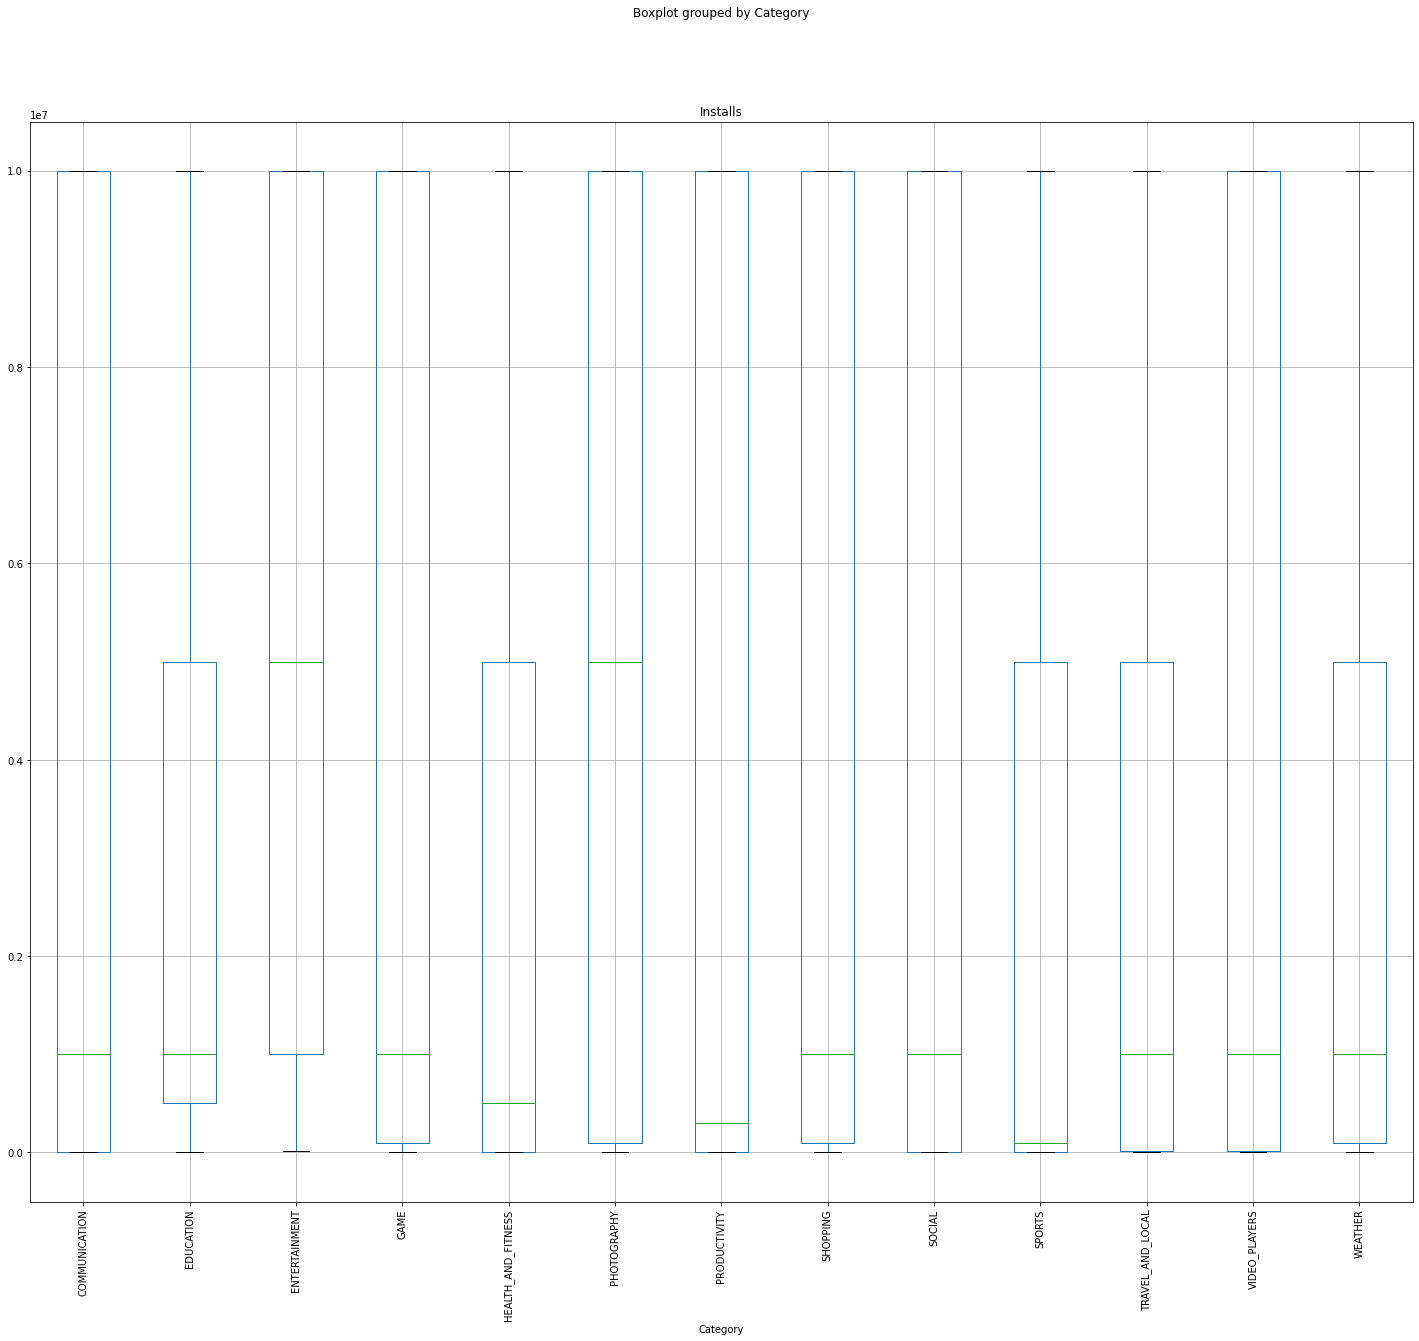

In [19]:
#data_high = df = df[df['Category'] == 'COMMUNICATION' or df['Category'] == 'EDUCATION']

data_high = data.groupby(['Category']).filter(lambda x:x['Installs'].quantile(.75)>1000000)

data_high.boxplot(column=['Installs'], by='Category',  figsize=(24, 20), rot=90, showfliers=False)

<AxesSubplot:title={'center':'Installs'}, xlabel='Category'>

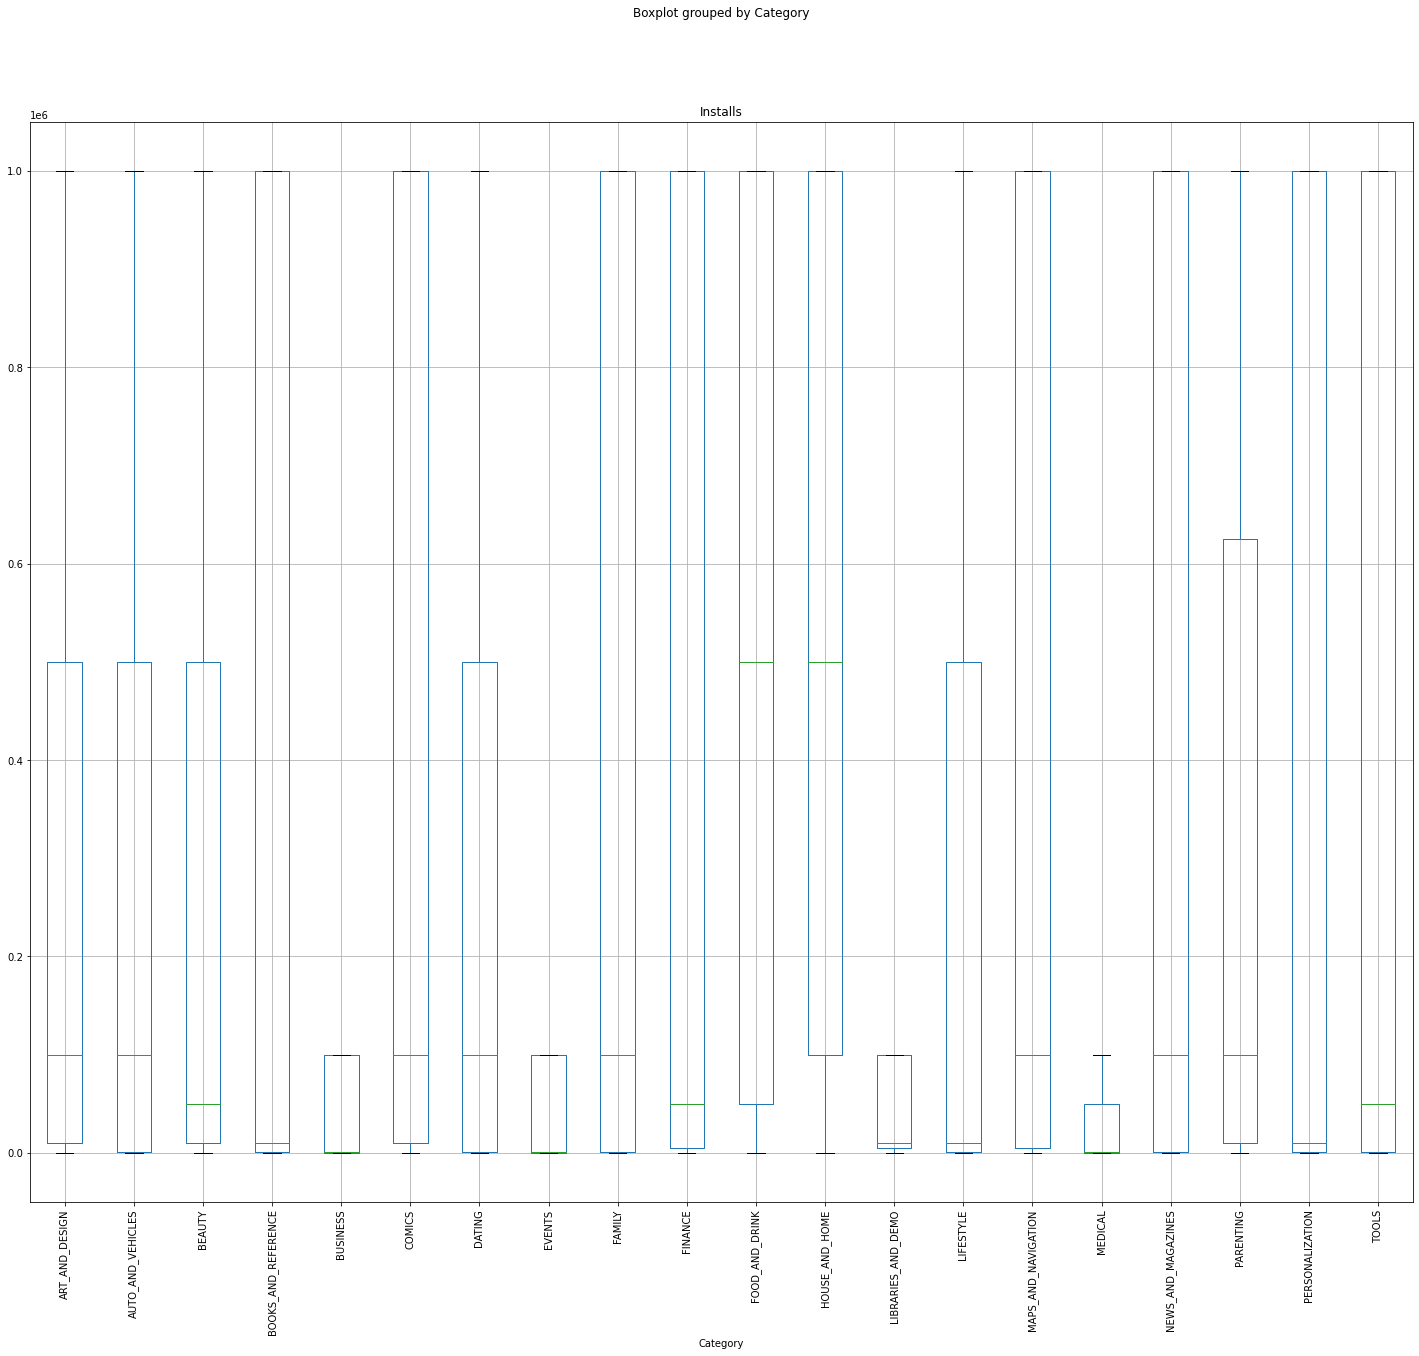

In [20]:

data_high = data.groupby(['Category']).filter(lambda x:x['Installs'].quantile(.75)<=1000000)

data_high.boxplot(column=['Installs'], by='Category',  figsize=(24, 20), rot=90, showfliers=False)

### Grouped by ContentRating

In [21]:
rp.summary_cont(data.groupby(['ContentRating']))['Installs']

,N,Mean,SD,SE,95% Conf.,Interval
ContentRating,,,,,,
Adults only 18+,3,6.666667e+05,2.886751e+05,1.666667e+05,-5.044212e+04,1.383775e+06
Everyone,8714,1.310037e+07,7.589771e+07,8.130549e+05,1.150659e+07,1.469415e+07
Everyone 10+,414,3.196590e+07,1.279523e+08,6.288512e+06,1.960442e+07,4.432738e+07
Mature 17+,499,1.107112e+07,4.395675e+07,1.967774e+06,7.204962e+06,1.493729e+07
Teen,1208,2.873870e+07,1.289372e+08,3.709752e+06,2.146042e+07,3.601698e+07
Unrated,2,2.525000e+04,3.500179e+04,2.475000e+04,-2.892286e+05,3.397286e+05


<AxesSubplot:title={'center':'Installs'}, xlabel='ContentRating'>

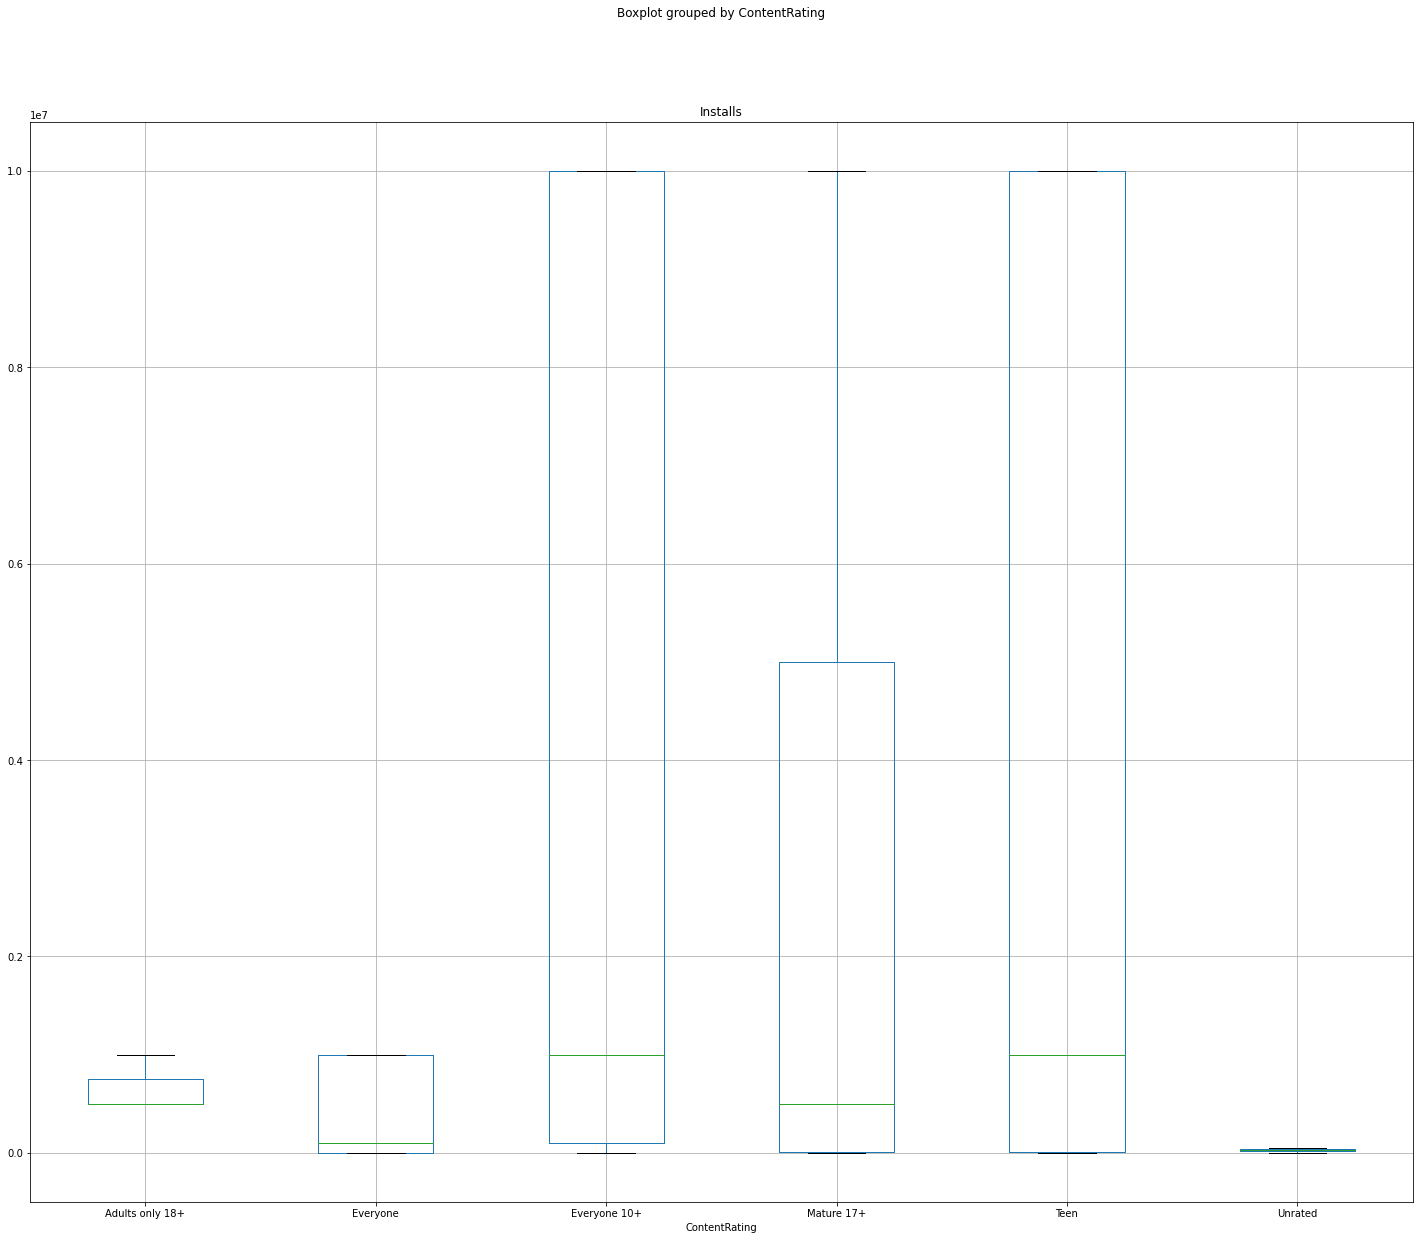

In [22]:
data.boxplot(column=['Installs'],  by='ContentRating',  figsize=(24, 20),showfliers=False)

## Linear Regression Analysis and Two-way ANOVA

### Installs ~ C(Category)

In [23]:
model_category = ols('Installs ~ C(Category)', data).fit()

print(model_category.summary())

                            OLS Regression Results                            
Dep. Variable:               Installs   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     16.53
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           6.32e-89
Time:                        19:45:45   Log-Likelihood:            -2.1304e+05
No. Observations:               10840   AIC:                         4.262e+05
Df Residuals:                   10807   BIC:                         4.264e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [35]:
results_category_html = model_category.summary().tables[1].as_html()

df_results_category = pd.read_html(results_category_html, header=0, index_col=0)[0]

df_results_category[df_results_category['P>|t|'] <= 0.05]

,coef,std err,t,P>|t|,[0.025,0.975]
C(Category)[T.COMMUNICATION],82450000.0,11100000.0,7.397,0.000,60600000.0,104000000.0
C(Category)[T.GAME],28760000.0,10600000.0,2.712,0.007,7980000.0,49500000.0
C(Category)[T.NEWS_AND_MAGAZINES],24580000.0,11400000.0,2.149,0.032,2160000.0,47000000.0
C(Category)[T.PHOTOGRAPHY],28200000.0,11300000.0,2.503,0.012,6110000.0,50300000.0
C(Category)[T.PRODUCTIVITY],31520000.0,11100000.0,2.846,0.004,9810000.0,53200000.0
C(Category)[T.SOCIAL],45780000.0,11400000.0,4.019,0.000,23500000.0,68100000.0
C(Category)[T.TRAVEL_AND_LOCAL],24710000.0,11500000.0,2.141,0.032,2090000.0,47300000.0
C(Category)[T.VIDEO_PLAYERS],33640000.0,12100000.0,2.786,0.005,9970000.0,57300000.0


### Installs ~ C(ContentRating)

In [24]:
model_contentRating = ols('Installs ~ C(ContentRating)', data).fit()

print(model_contentRating.summary())

                            OLS Regression Results                            
Dep. Variable:               Installs   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     10.70
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           2.82e-10
Time:                        19:45:46   Log-Likelihood:            -2.1328e+05
No. Observations:               10840   AIC:                         4.266e+05
Df Residuals:                   10834   BIC:                         4.266e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [36]:
results_contentRating_html = model_contentRating.summary().tables[1].as_html()

df_results_contentRating = pd.read_html(results_html, header=0, index_col=0)[0]

df_results_contentRating[df_results_contentRating['P>|t|'] <= 0.05]


,coef,std err,t,P>|t|,[0.025,0.975]


### Installs ~ C(ContentRating) + C(Category)

In [26]:
model_CategoryPlusContent = ols('Installs ~ C(ContentRating) + C(Category)', data).fit()

print(model_CategoryPlusContent.summary())

                            OLS Regression Results                            
Dep. Variable:               Installs   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     15.17
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           3.00e-92
Time:                        19:45:46   Log-Likelihood:            -2.1303e+05
No. Observations:               10840   AIC:                         4.261e+05
Df Residuals:                   10802   BIC:                         4.264e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [37]:
results_CategoryPlusContent_html = model_CategoryPlusContent.summary().tables[1].as_html()

df_results_CategoryPlusContent = pd.read_html(results_CategoryPlusContent_html, header=0, index_col=0)[0]

df_results_CategoryPlusContent[df_results_CategoryPlusContent['P>|t|'] <= 0.05]

,coef,std err,t,P>|t|,[0.025,0.975]
C(Category)[T.COMMUNICATION],82450000.0,11100000.0,7.406,0.000,60600000.0,104000000.0
C(Category)[T.GAME],24630000.0,10600000.0,2.317,0.021,3790000.0,45500000.0
C(Category)[T.PHOTOGRAPHY],28650000.0,11300000.0,2.546,0.011,6590000.0,50700000.0
C(Category)[T.PRODUCTIVITY],32030000.0,11100000.0,2.896,0.004,10300000.0,53700000.0
C(Category)[T.SOCIAL],42900000.0,11500000.0,3.731,0.000,20400000.0,65400000.0
C(Category)[T.TRAVEL_AND_LOCAL],25250000.0,11500000.0,2.191,0.028,2660000.0,47800000.0
C(Category)[T.VIDEO_PLAYERS],32830000.0,12100000.0,2.721,0.007,9180000.0,56500000.0


In [27]:
sm.stats.anova_lm(model_CategoryPlusContent)

,df,sum_sq,mean_sq,F,PR(>F)
C(ContentRating),5.0,3.850541e+17,7.701082e+16,11.166922,9.375111e-11
C(Category),32.0,3.486638e+18,1.089574e+17,15.799327,2.342911e-84
Residual,10802.0,7.449419e+19,6.896334e+15,NaN,NaN


### Installs ~ C(ContentRating) * C(Category)

In [28]:
model_CategoryByContent = ols('Installs ~ C(ContentRating) * C(Category)', data).fit()

print(model_CategoryByContent.summary())

                            OLS Regression Results                            
Dep. Variable:               Installs   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     7.044
Date:                Wed, 03 Feb 2021   Prob (F-statistic):          6.28e-102
Time:                        19:45:48   Log-Likelihood:            -2.1290e+05
No. Observations:               10840   AIC:                         4.260e+05
Df Residuals:                   10722   BIC:                         4.269e+05
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [41]:
results_CategoryByContent_html = model_CategoryByContent.summary().tables[1].as_html()

df_results_CategoryByContent = pd.read_html(results_CategoryByContent_html, header=0, index_col=0)[0]

df_results_CategoryByContent[df_results_CategoryByContent['P>|t|'] <= 0.05]

,coef,std err,t,P>|t|,[0.025,0.975]


In [29]:
sm.stats.anova_lm(model_CategoryByContent)

,df,sum_sq,mean_sq,F,PR(>F)
C(ContentRating),5.0,3.850541e+17,7.701082e+16,11.346548,6.139814e-11
C(Category),32.0,3.486638e+18,1.089574e+17,16.053468,6.290294e-86
C(ContentRating):C(Category),160.0,2.585834e+18,1.616146e+16,2.381182,1.415508e-19
Residual,10722.0,7.277191e+19,6.787158e+15,NaN,NaN
